<a href="https://colab.research.google.com/github/stellahrotich/CCC503/blob/master/CCC503Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

# Load libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [0]:
# Load dataset direct from the UCI Machine Learning Repositoy
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
dataset = pd.read_csv(url, names=names)

In [60]:

# check the instances the dataset has
print(dataset.shape)

(150, 5)


In [61]:
#check to see the contents of the dataset by the first ten set
print(dataset.head(10))

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa
5            5.4           3.9            1.7           0.4  Iris-setosa
6            4.6           3.4            1.4           0.3  Iris-setosa
7            5.0           3.4            1.5           0.2  Iris-setosa
8            4.4           2.9            1.4           0.2  Iris-setosa
9            4.9           3.1            1.5           0.1  Iris-setosa


In [40]:
#tail of the dataset
print(dataset.tail(10))

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
140            6.7           3.1            5.6           2.4  Iris-virginica
141            6.9           3.1            5.1           2.3  Iris-virginica
142            5.8           2.7            5.1           1.9  Iris-virginica
143            6.8           3.2            5.9           2.3  Iris-virginica
144            6.7           3.3            5.7           2.5  Iris-virginica
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica


In [62]:

# descriptions of the datasets .This is to check the statistical summaru of the data
print(dataset.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


In [64]:
# class distribution
print(dataset.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


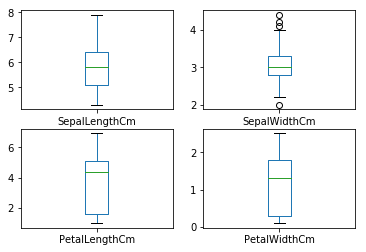

In [65]:

# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

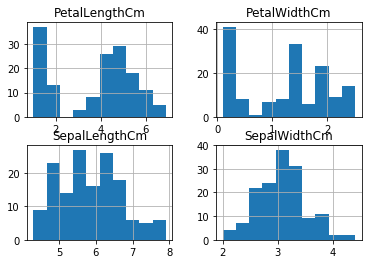

In [66]:

# plot again to explore more
dataset.hist()
plt.show()

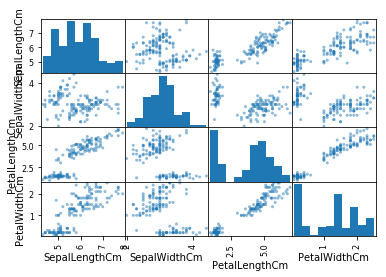

In [67]:

# scatter plot matrix
scatter_matrix(dataset)
plt.show()

In [0]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [70]:

#taking only first 50 columns of Iris-setosa species
m,n=dataset.shape
X=dataset.SepalLengthCm.iloc[0:50].values.reshape(50,1)
Y=dataset.SepalWidthCm.iloc[0:50].values.reshape(50,1)

Xnew=np.hstack((np.ones((50,1)),X))

np.random.seed(0)
theta=np.random.randn(1,2)
print('Theta:',theta)

iters=10000
J=np.zeros(iters)
learning_rate=0.001

Theta: [[1.76405235 0.40015721]]


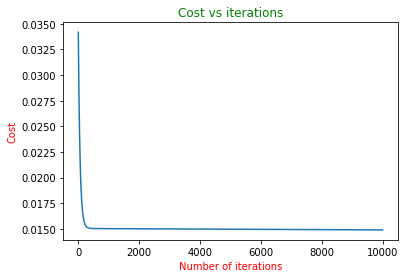

In [71]:
#training

for i in range(iters):
    J[i]=(1/(2*m))*np.sum((np.dot(Xnew,theta.T)-Y)**2)
    theta[0,0]-=(learning_rate/m)*np.sum(np.dot(Xnew,theta.T)-Y)
    theta[0,1]-=(learning_rate/m)*np.sum((np.dot(Xnew,theta.T)-Y)*X)
plt.plot(np.arange(iters),J)
plt.xlabel('Number of iterations',color='red')
plt.ylabel('Cost',color='red')
plt.title('Cost vs iterations',color='green')
plt.show()

Theta after Gradient Descent: [[1.71458981 0.34244649]]


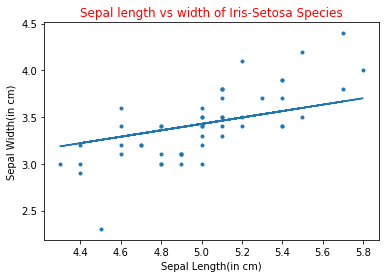

In [74]:
print('Theta after Gradient Descent:',theta)
plt.scatter(X,Y,marker='.')
plt.plot(X,np.dot(Xnew,theta.T))
plt.xlabel('Sepal Length(in cm)')
plt.ylabel('Sepal Width(in cm)')
plt.title('Sepal length vs width of Iris-Setosa Species',color='red')
plt.show()

In [0]:

# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [76]:

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.966667 (0.040825)
KNN: 0.983333 (0.033333)
SVM: 0.991667 (0.025000)


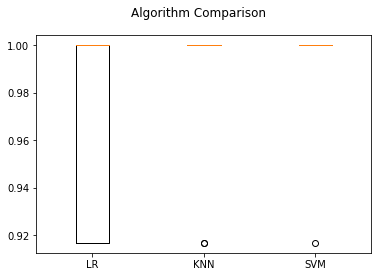

In [77]:

# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [78]:

# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30

